In [45]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn import set_config
set_config(display='diagram')

In [29]:
# 0 = defaulter and 1 = good customer
data = pd.read_csv("credit_data.csv")
data.head(3)


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,... < 100 DM,6,critical account/other credits existing,domestic appliances,1169,unknown/no savings account,... >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee/official,1,yes,yes,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee/official,1,no,yes,0
2,no checking account,12,critical account/other credits existing,retraining,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,no,yes,1


In [3]:
data.shape

(1000, 21)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   int64 
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   int64 
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [11]:
# data.describe()                         

In [12]:
# data['credit_risk'].value_counts()           

In [14]:
target = "credit_risk"

In [17]:
num_cols = data.select_dtypes(include=['int64','float64']).columns.tolist()
num_cols.remove(target)

In [18]:
cat_cols = data.select_dtypes(include=['object']).columns.tolist()

In [19]:
print('Numerics :',num_cols)
print('Category :',cat_cols)

Numerics : ['duration', 'amount', 'installment_rate', 'present_residence', 'age', 'number_credits', 'people_liable']
Category : ['status', 'credit_history', 'purpose', 'savings', 'employment_duration', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker']


In [20]:
data.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

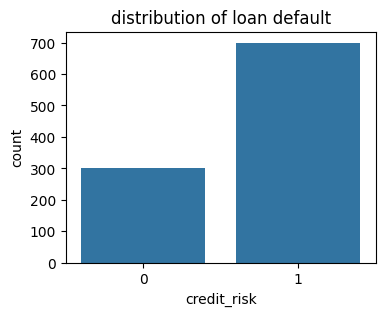

In [24]:
plt.figure(figsize=(4,3))
sns.countplot(x=data[target])
plt.title("distribution of loan default")
plt.show()

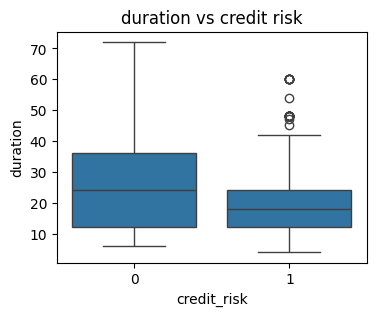

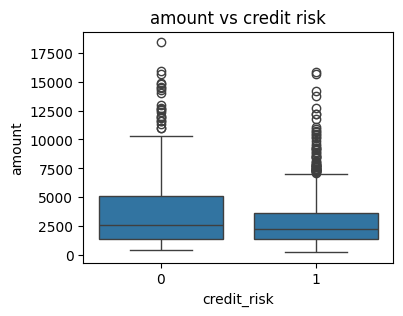

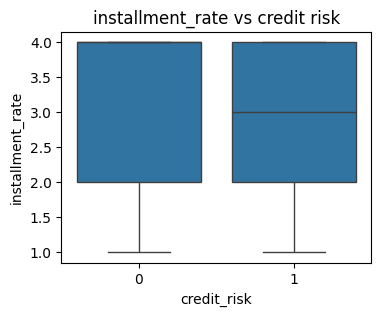

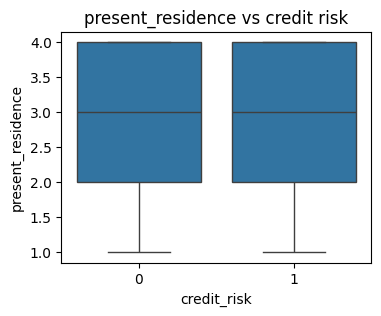

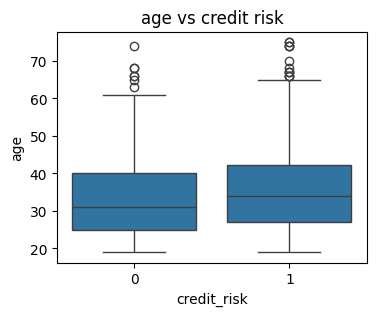

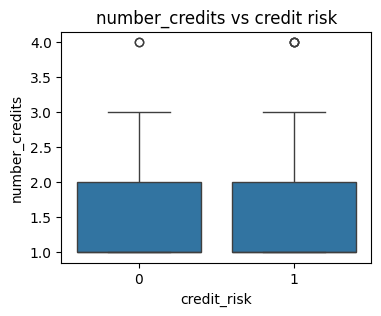

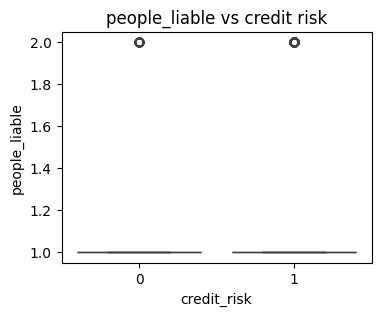

In [47]:
for col in num_cols:
    plt.figure(figsize=(4,3))
    sns.boxplot(x=target,y=col,data=data)
    plt.title(f"{col} vs credit risk")
    plt.show()

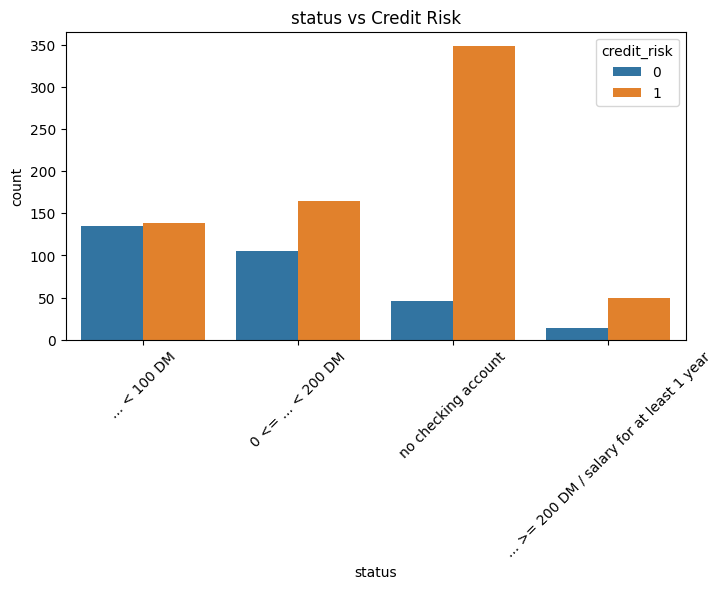

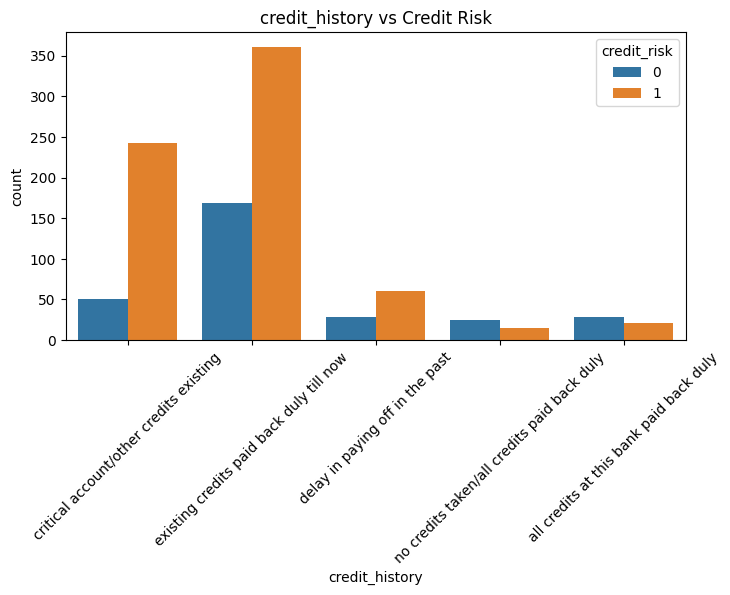

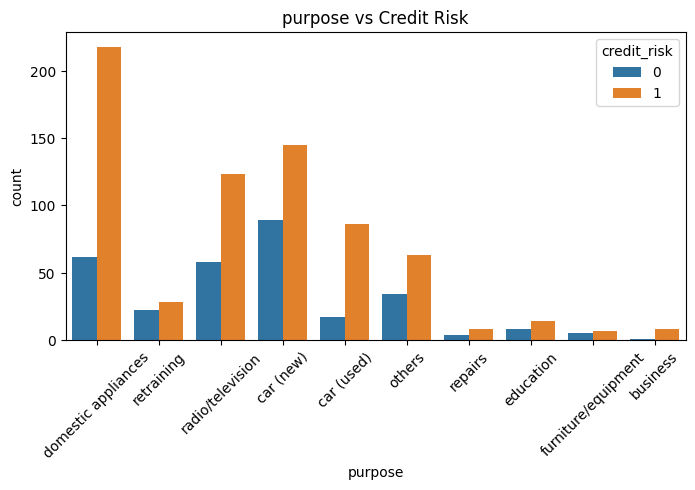

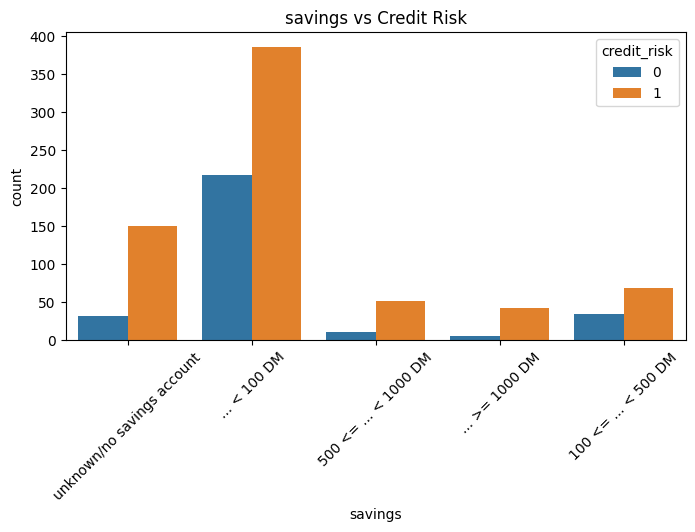

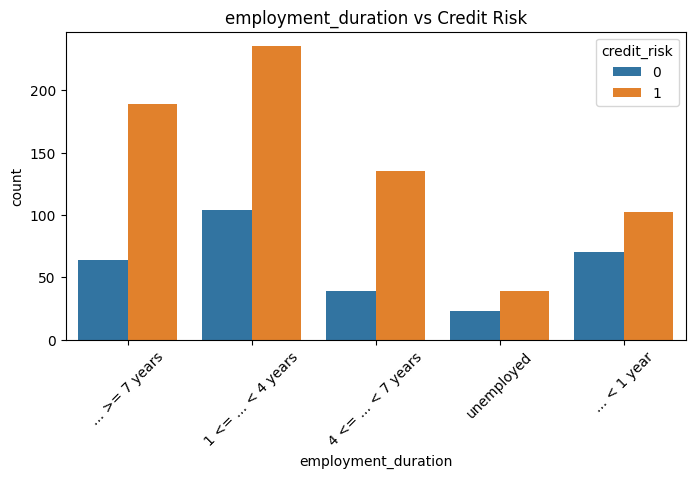

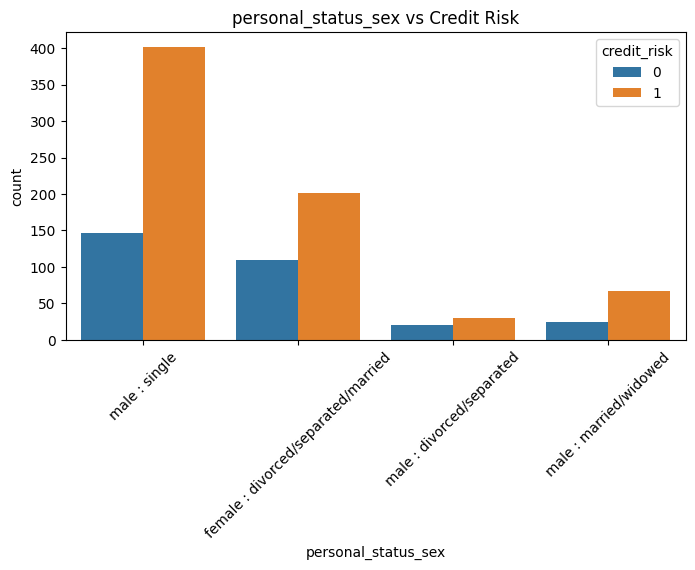

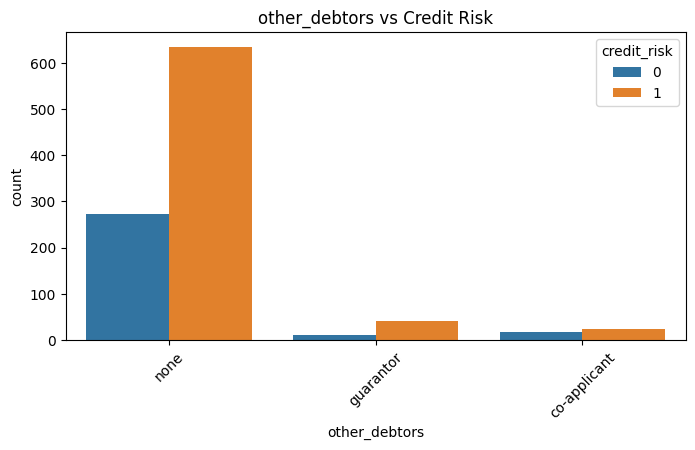

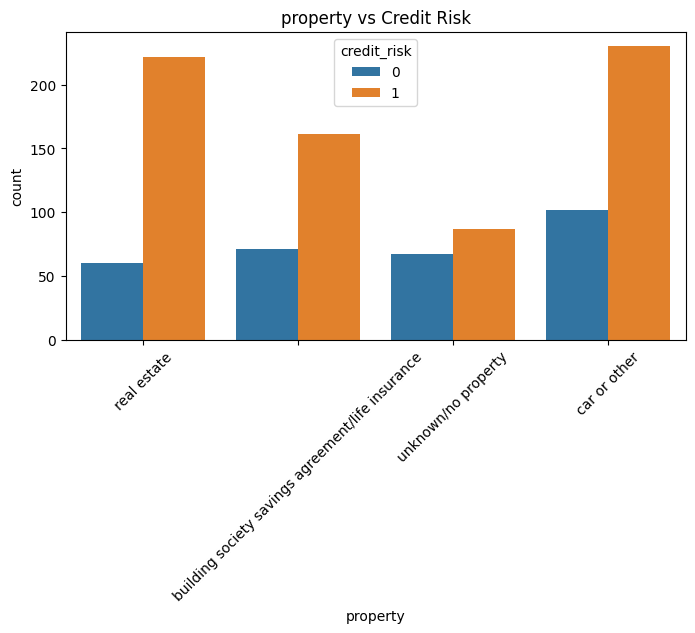

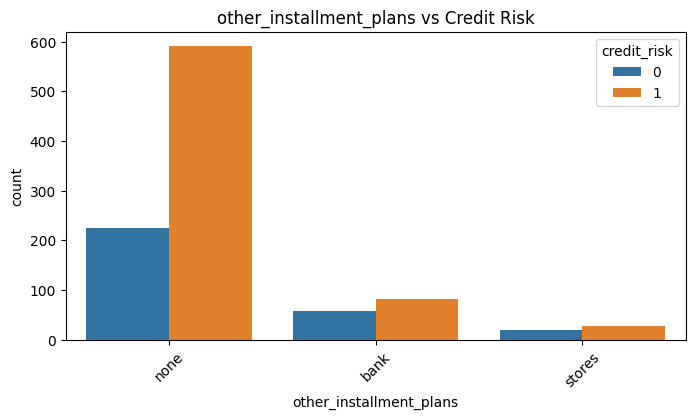

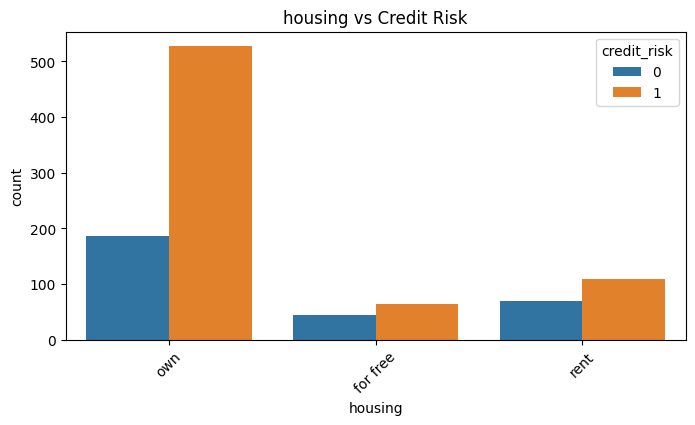

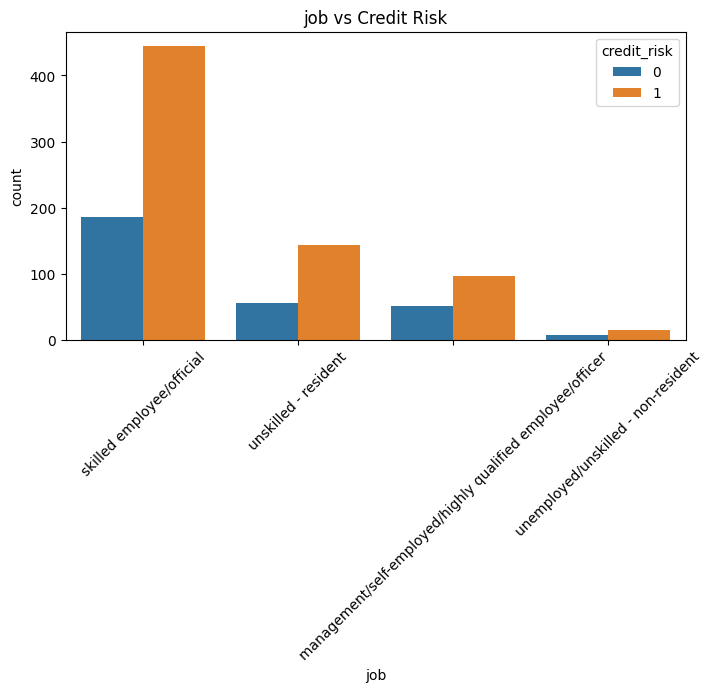

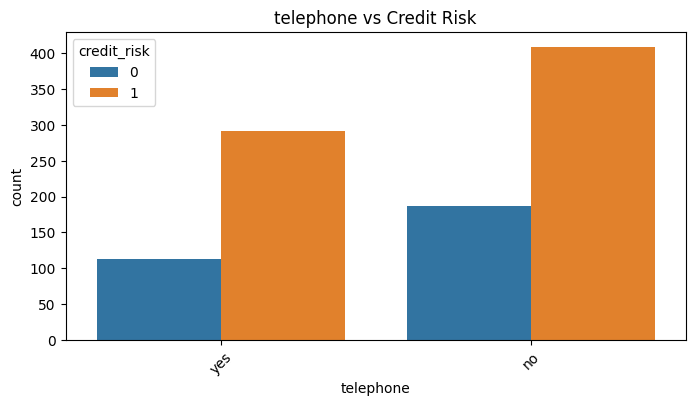

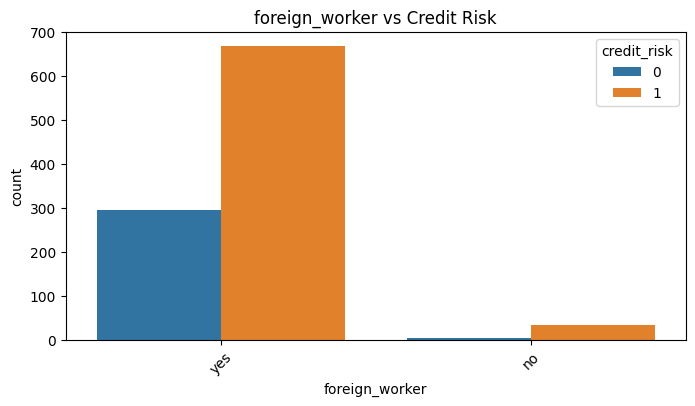

In [49]:
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=data, x=col, hue=target)
    plt.xticks(rotation=45)
    plt.title(f"{col} vs Credit Risk")
    plt.show()


In [50]:
pd.crosstab(data['savings'], data['credit_risk'], normalize='index')*100


credit_risk,0,1
savings,,
... < 100 DM,35.986733,64.013267
... >= 1000 DM,12.500000,87.500000
100 <= ... < 500 DM,33.009709,66.990291
500 <= ... < 1000 DM,17.460317,82.539683
unknown/no savings account,17.486339,82.513661


In [51]:
X = data.drop("credit_risk",axis=1)
y = data["credit_risk"]

In [52]:
from sklearn.model_selection import train_test_split
# stratify balnce you imbalced dataset when split the data
x_train,x_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)


In [53]:
# Why from X_train?
# Because the test set must stay completely unseen.

num_cols = x_train.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = data.select_dtypes(include=['object']).columns.tolist()

print("Numerical :",num_cols)
print("Categorical :",cat_cols)

Numerical : ['duration', 'amount', 'installment_rate', 'present_residence', 'age', 'number_credits', 'people_liable']
Categorical : ['status', 'credit_history', 'purpose', 'savings', 'employment_duration', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker']


In [54]:
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [55]:
num_trasformer = Pipeline(steps=[
    ('scaler',StandardScaler())
])

In [56]:
cat_transformer = Pipeline(steps=[
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
])

In [59]:
preprocessor = ColumnTransformer([
    ('num',num_trasformer,num_cols),
    ('cat',cat_transformer,cat_cols)
])

In [60]:
preprocessor.fit(x_train)

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_name``. e.g. `

In [61]:
x_train_processed = preprocessor.transform(x_train)
x_test_processed = preprocessor.transform(x_test)

In [63]:
from sklearn.linear_model import LogisticRegression

In [71]:
model = Pipeline([
    ('preprocessing',preprocessor),
    ('classifier',LogisticRegression(max_iter=1000,class_weight='balanced'))
])

In [72]:
model.fit(x_train,y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transform

In [73]:
y_pred = model.predict(x_test)

In [74]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [75]:
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))

Accuracy:  0.675

Confusion Matrix:
 [[42 18]
 [47 93]]

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.70      0.56        60
           1       0.84      0.66      0.74       140

    accuracy                           0.68       200
   macro avg       0.65      0.68      0.65       200
weighted avg       0.73      0.68      0.69       200



In [76]:
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt 

In [77]:
y_prob = model.predict_proba(x_test)[:,1]

In [78]:
auc = roc_auc_score(y_test,y_prob)
print("ROC - AUC Score: ",auc)

ROC - AUC Score:  0.7599999999999999


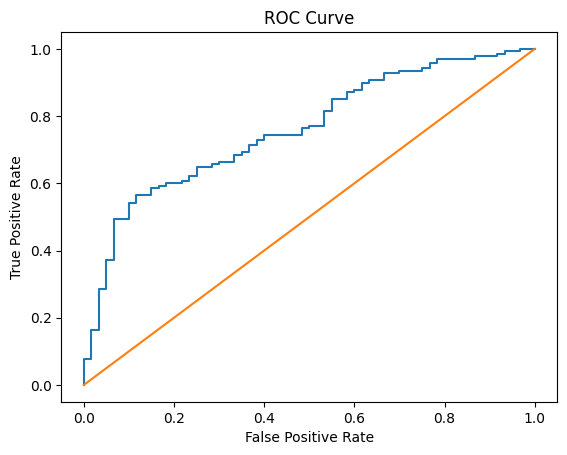

In [83]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


In [84]:
import numpy as np

y_pred_07 = np.where(y_prob >= 0.7, 1, 0)


In [85]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred_07))
print(classification_report(y_test, y_pred_07))


[[56  4]
 [75 65]]
              precision    recall  f1-score   support

           0       0.43      0.93      0.59        60
           1       0.94      0.46      0.62       140

    accuracy                           0.60       200
   macro avg       0.68      0.70      0.60       200
weighted avg       0.79      0.60      0.61       200



In [86]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rf_model = Pipeline([
    ('preprocessing',preprocessor),
    ('classifier',RandomForestClassifier(
        n_estimators=300,max_depth=8,random_state=42,class_weight='balanced'
    ))
])

In [89]:
rf_model.fit(x_train,y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transform

In [91]:
y_pred_rf = rf_model.predict(x_test)

In [93]:
from sklearn.metrics import classification_report
print("classification report\n",classification_report(y_test,y_pred_rf))

classification report
               precision    recall  f1-score   support

           0       0.51      0.55      0.53        60
           1       0.80      0.77      0.79       140

    accuracy                           0.70       200
   macro avg       0.65      0.66      0.66       200
weighted avg       0.71      0.70      0.71       200



In [94]:
y_porb_rf = rf_model.predict_proba(x_test)[:,1]

In [95]:
import numpy as np
y_pred_rf_07 = np.where(y_porb_rf >= 0.7 , 1, 0)

In [98]:
print("confusion matrix : \n",confusion_matrix(y_test,y_pred_rf_07))
print("classification report: \n",classification_report(y_test,y_pred_rf_07))

confusion matrix : 
 [[56  4]
 [80 60]]
classification report: 
               precision    recall  f1-score   support

           0       0.41      0.93      0.57        60
           1       0.94      0.43      0.59       140

    accuracy                           0.58       200
   macro avg       0.67      0.68      0.58       200
weighted avg       0.78      0.58      0.58       200



In [99]:
import joblib

joblib.dump(model,"credit_risk_model.pkl")

['credit_risk_model.pkl']